In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

from google.colab.patches import cv2_imshow
%matplotlib inline

In [ ]:
def calculate_cdf(histogram):
    #digunakan untuk mencari cumulative distribution function yang sudah di normalize dari histogram gambar yang ada
    
    cdf = histogram.cumsum()
    normalized_cdf = cdf / float(cdf.max())
 
    return normalized_cdf

def calculate_lookup(src_cdf, ref_cdf):
    #digunakan untuk membuat lookup table yang nanti akan digunakan untuk menyesuaikan setiap gambarnya dengan target references
    
    lookup_table = np.zeros(256)
    lookup_val = 0
    for src_pixel_val in range(len(src_cdf)):
        lookup_val
        for ref_pixel_val in range(len(ref_cdf)):
            if ref_cdf[ref_pixel_val] >= src_cdf[src_pixel_val]:
                lookup_val = ref_pixel_val
                break
        lookup_table[src_pixel_val] = lookup_val
    return lookup_table

def match_histograms(src_image, ref_image):
    #gambarnya di split dulu menjadi 3 attribute warna B G R
    src_b, src_g, src_r = cv.split(src_image)
    ref_b, ref_g, ref_r = cv.split(ref_image)
 
    #lalu setiap warna akan di hitung histogramnya sendiri-diri
    src_hist_blue, bin_0 = np.histogram(src_b.flatten(), 256, [0,256])
    src_hist_green, bin_1 = np.histogram(src_g.flatten(), 256, [0,256])
    src_hist_red, bin_2 = np.histogram(src_r.flatten(), 256, [0,256])    
    ref_hist_blue, bin_3 = np.histogram(ref_b.flatten(), 256, [0,256])    
    ref_hist_green, bin_4 = np.histogram(ref_g.flatten(), 256, [0,256])
    ref_hist_red, bin_5 = np.histogram(ref_r.flatten(), 256, [0,256])
 
    #menghitung cdf setiap warna
    src_cdf_blue = calculate_cdf(src_hist_blue)
    src_cdf_green = calculate_cdf(src_hist_green)
    src_cdf_red = calculate_cdf(src_hist_red)
    ref_cdf_blue = calculate_cdf(ref_hist_blue)
    ref_cdf_green = calculate_cdf(ref_hist_green)
    ref_cdf_red = calculate_cdf(ref_hist_red)
 
    #Membuat lookup table untuk setiap warna
    blue_lookup_table = calculate_lookup(src_cdf_blue, ref_cdf_blue)
    green_lookup_table = calculate_lookup(src_cdf_green, ref_cdf_green)
    red_lookup_table = calculate_lookup(src_cdf_red, ref_cdf_red)
 
    # transform gambarnya berdasarkan lookup table tadi
    blue_after_transform = cv.LUT(src_b, blue_lookup_table)
    green_after_transform = cv.LUT(src_g, green_lookup_table)
    red_after_transform = cv.LUT(src_r, red_lookup_table)
 
    # Menggabungkan BGR tadi menjadi 1 gambar
    image_after_matching = cv.merge([
        blue_after_transform, green_after_transform, red_after_transform])
    image_after_matching = cv.convertScaleAbs(image_after_matching)
 
    return image_after_matching

    

In [ ]:
img2 = cv.imread('input_image.jpg')
reference2 = cv.imread('reference.jpg')

output_image = match_histograms(img2, reference2)


In [ ]:
output3 = [output_image,reference2]
titles3 = ['equalized image','references']

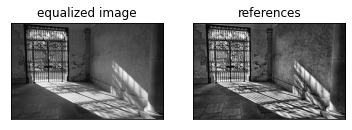

In [ ]:
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(output3[i],cmap='gray')
    plt.title(titles3[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

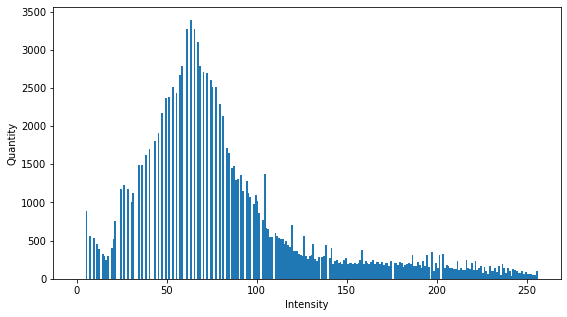

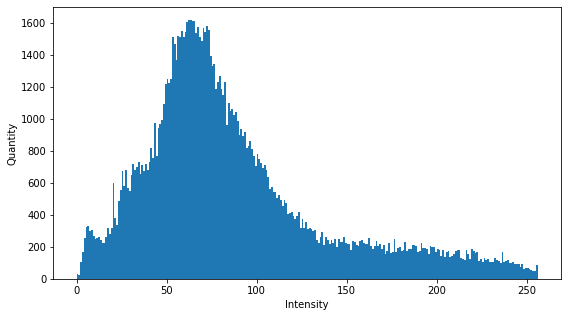

In [ ]:
for i in range(2):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,i+1)
    plt.hist(output3[i].ravel(), 256 ,[0,256])
    # plt.legend(loc = 'upper right')
    plt.xlabel('Intensity')
    plt.ylabel('Quantity')
plt.show()